# Assignment 2 - Supervised Machine Learning Fundamentals

## *BARBARA FLORES RIOS*
Netid: bpf17

*Names of students you worked with on this assignment*: LIST HERE IF APPLICABLE (delete if not)

Instructions for all assignments can be found [here](https://kylebradbury.github.io/ids705/notebooks/assignment_instructions.html).

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

In [2]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay

---

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

>Before addressing the following scenarios, it is important to note that there are no strict rules to determine whether a flexible or inflexible method is preferable. The choice depends on various factors, such as the interpretability of the model and computational efficiency.
>
>For example, if interpretability is highly valued or there are computational limitations, an inflexible model may be preferable. Its simplicity facilitates understanding, and its lower complexity can be more efficient in terms of computational resources.
>
>Therefore, we will consider that, while the choice between flexible and inflexible methods depends on the specific context, in the following questions, we will approach the scenarios with a general perspective.
>
>1 . The sample size $n$ is extremely large, and the number of predictors $p$ is small.
>
> In this case, we would prefer a `flexible model` since, with an extremely large sample size and a small number of predictors $p$, we can train the model more robustly, avoiding overfitting, and leveraging the flexible model's ability to capture complex patterns. If the number of predictors $p$ is small, the additional complexity of a flexible model is not a significant problem.
>
>2 . The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
>
> In this scenario, opting for a `inflexible model` would be better. This is because, with an extremely large number of predictors $p$ and a small sample size $n$, a highly flexible model could struggle to generalize effectively. The additional complexity could lead to significant overfitting, especially given the limited number of observations available to reliably estimate the relationships among so many predictors.
>
>3 . The relationship between the predictors and response is highly non-linear.
>
> In this scenario, opting for a `flexible model` is preferable to capture the underlying patterns between the independent and dependent variables. However, it's crucial to be cautious, as excessive flexibility could lead to overfitting. Finding a balance is generally expected. Nonetheless, choosing an inflexible model, such as linear regression, would not be recommended due to the highly non-linear nature of the relationship between predictors and the response.
>
>4 . The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high
>
> In this scenario, choosing a `inflexible model` is preferable. Given the high level of variability, employing a highly flexible model tends to closely fit to this variability in our data, resulting in overfitting. A less flexible model, with better generalization capability, would be more appropriate.

---

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


>**(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.**
>
>(i) In this case, we are dealing with a `regression problem` because our dependent variable is numerical (CEO salary). 
>
>(ii) In the presented scenario, we are addressing an `inference problem` since our primary interest lies in understanding the association between our dependent variable (CEO salary) and our independent variables, rather than predicting the dependent variable for new data. 
>
>(iii) The sample size `n is 500`, and the number of predictors `p is 3` (profit, number of employees, industry). It's worth noting that when working with the 'industry' variable, transforming it into a binary form for modeling purposes may result in (N° of distinct industries - 1) additional predictors due to the encoding process.
>
>**(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.**
>
>(i) It is a `classification problem` since the dependent variable is binary and categorical, indicating whether a product is a success or a failure.
>
>(ii) In this case, we are dealing with a `prediction problem`. We want to use the data collected on similar products launched previously to predict whether our new product will be a success or a failure.
>
>(iii) The sample size `n is 20`, and the number of predictors `p is 13` (price charged for the product, marketing budget, competition price, and ten other variables).
>
>**(c) We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.**
>
>(i) This is a `regression problem` since the variable to predict is a continuous numerical variable (% change in the US dollar).
>
>(ii) Our primary interest is in solving a `prediction problem`, as explicitly stated in the problem definition. The main goal is to predict, for future scenarios, the value of our dependent variable, % change in the US dollar .
>
>(iii) Given the weekly data for the entire year of 2012, our sample size `n is 52`. The number of predictors `p is 3` (the % change in the US market, the % change in the British market, and the % change in the German market).

---

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [3]:
import numpy as np

X = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3],
             [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
y = np.array(["r", "r", "r", "b", "b", "r"])

**ANSWER**:

In [4]:
print("(a)")
print(
    "\nIt's worth mentioning that, given that variables x1, x2, and x3 are on similar scales, we will not normalize the variables"
)

x0 = np.array([0, 0, 0])

euclidean_distance = ((np.sum((X - x0) ** 2, axis=1)) ** 0.5).round(2)
result = np.column_stack((np.arange(1, 7), X, y, euclidean_distance))

column_names = ["Obs.", "x1", "x2", "x3", "y", "euclidean dist"]
df = pd.DataFrame(result, columns=column_names)
df.set_index("Obs.", inplace=True)
df

(a)

It's worth mentioning that, given that variables x1, x2, and x3 are on similar scales, we will not normalize the variables


,x1,x2,x3,y,euclidean dist
Obs.,,,,,
1,0,3,0,r,3.0
2,2,0,0,r,2.0
3,0,1,3,r,3.16
4,0,1,2,b,2.24
5,-1,0,1,b,1.41
6,1,1,1,r,1.73


>**(b)What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?** 
>
>If $K=1$, the prediction for $\hat{y}$ is `Blue` because the first nearest neighbor is the 5th observation, which is at a distance of 1.41 units and belongs to the Blue category.
>
>**(c) What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?**
>
>In the case of using $K=3$ , we will consider the 3 closest observations, which are the 5th (Blue), 6th (Red), and 2nd (Red). These are located at distances of 1.41, 1.73, and 2, respectively, from the observation we want to predict. Since out of these 3 observations we have 2 Red and 1 Blue, the prediction for $\hat{y}$ with $K=3$  is `Red`.
>
>**(d) If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?**
>
>In a KNN classifier, a low value of $K$ provides a lot of flexibility to the model, allowing for a more precise adaptation to the complexities of a nonlinear decision boundary. As $K$ increases, the model becomes less flexible and tends to produce a decision boundary that  is close to linear. Since our Bayes decision boundary is highly nonlinear, it would be preferable to opt for a more flexible model, which translates to a `small value for K`, to better capture the inherent complexity in the data and fit more closely to the nonlinear optimal decision boundary.

---

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation? *Hint: your results should be identical to that of the scikit-learn implementation.*

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

In [5]:
# Skeleton code for part (a) to write your own kNN classifier


class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass

    def fit(self, x, y):
        # Save the training data to properties of this class
        pass

    def predict(self, x, k):
        y_hat = []  # Variable to store the estimated class label for
        # Calculate the distance from each vector in x to the training data

        # Return the estimated targets
        return y_hat


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)


def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**ANSWER**:

In [6]:
# (a)
class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x_train = None
        self.y_train = None

    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x_train = x
        self.y_train = y

    def predict(self, x, k):
        y_hat = []  # Variable to store the estimated class label for
        # Calculate the distance from each vector in x to the training data

        euclidean_distance = (
            np.sum((self.x_train[:, np.newaxis] - x) ** 2, axis=2) ** 0.5
        )

        for column in euclidean_distance.T:
            k_smallest_d_indices = np.argsort(column)[:k]
            y_predicted = round(np.mean(self.y_train[k_smallest_d_indices]))
            y_hat.append(y_predicted)

        return np.array(y_hat)


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)


def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [7]:
# (b)

path = "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/"

X_train_low = pd.read_csv(
    path + "A2_X_train_low.csv",
    header=None,
).values

y_train_low = pd.read_csv(
    path + "A2_y_train_low.csv",
    header=None,
).values.flatten()

X_test_low = pd.read_csv(
    path + "A2_X_test_low.csv",
    header=None,
).values

y_test_low = pd.read_csv(
    path + "A2_y_test_low.csv",
    header=None,
).values.flatten()

X_train_high = pd.read_csv(
    path + "A2_X_train_high.csv",
    header=None,
).values

y_train_high = pd.read_csv(
    path + "A2_y_train_high.csv",
    header=None,
).values.flatten()

X_test_high = pd.read_csv(
    path + "A2_X_test_high.csv",
    header=None,
).values

y_test_high = pd.read_csv(
    path + "A2_y_test_high.csv",
    header=None,
).values.flatten()

In [8]:
# (c)

# Low dimensional dataset, K = 5
Knn_low = Knn()
Knn_low.fit(X_train_low, y_train_low)

start_time_low = time.time()
y_hat_low = Knn_low.predict(X_test_low, 5)
end_time_low = time.time()

time_low = end_time_low - start_time_low
accuracy_low = accuracy(y_test_low, y_hat_low)

print(f"Low-dimensional dataset results:")
print(f"Time taken for predictions: {round(time_low, 4)} seconds")
print(f"Accuracy: {accuracy_low * 100:.2f}%\n")

# High dimensional dataset, K = 5
Knn_high = Knn()
Knn_high.fit(X_train_high, y_train_high)

start_time_high = time.time()
y_hat_high = Knn_high.predict(X_test_high, 5)
end_time_high = time.time()

time_high = end_time_high - start_time_high
accuracy_high = accuracy(y_test_high, y_hat_high)

print(f"High-dimensional dataset results:")
print(f"Time taken for predictions: {round(time_high, 4)} seconds")
print(f"Accuracy: {accuracy_high * 100:.2f}%\n")

Low-dimensional dataset results:
Time taken for predictions: 0.0636 seconds
Accuracy: 92.50%

High-dimensional dataset results:
Time taken for predictions: 0.2228 seconds
Accuracy: 99.30%



In [9]:
# (d)

# Low dimensional dataset, K = 5
Knn_low_sklearn = KNeighborsClassifier(n_neighbors=5)
Knn_low_sklearn.fit(X_train_low, y_train_low)

start_time_low_sklearn = time.time()
y_hat_low_sklearn = Knn_low_sklearn.predict(X_test_low)
end_time_low_sklearn = time.time()

time_low_sklearn = end_time_low_sklearn - start_time_low_sklearn
accuracy_low_sklearn = accuracy(y_test_low, y_hat_low_sklearn)

print(f"Low-dimensional dataset results with scikit-learn:")
print(f"Time taken for predictions: {round(time_low_sklearn, 4)} seconds")
print(f"Accuracy: {accuracy_low_sklearn * 100:.2f}%\n")

# High dimensional dataset, K = 5
Knn_high_sklearn = KNeighborsClassifier(n_neighbors=5)
Knn_high_sklearn.fit(X_train_high, y_train_high)

start_time_high_sklearn = time.time()
y_hat_high_sklearn = Knn_high_sklearn.predict(X_test_high)
end_time_high_sklearn = time.time()

time_high_sklearn = end_time_high_sklearn - start_time_high_sklearn
accuracy_high_sklearn = accuracy(y_test_high, y_hat_high_sklearn)

print(f"High-dimensional dataset results with scikit-learn:")
print(f"Time taken for predictions: {round(time_high_sklearn, 4)} seconds")
print(f"Accuracy: {accuracy_high_sklearn * 100:.2f}%")

Low-dimensional dataset results with scikit-learn:
Time taken for predictions: 0.0145 seconds
Accuracy: 92.50%

High-dimensional dataset results with scikit-learn:
Time taken for predictions: 0.0804 seconds
Accuracy: 99.30%


In [10]:
print(f"Low-dimensional dataset comparison:")
print(
    f"Scikit-learn is {time_low / time_low_sklearn:.2f} times faster than my model.\n"
)

print(f"High-dimensional dataset comparison:")
print(
    f"Scikit-learn is {time_high / time_high_sklearn:.2f} times faster than my model."
)

Low-dimensional dataset comparison:
Scikit-learn is 4.40 times faster than my model.

High-dimensional dataset comparison:
Scikit-learn is 2.77 times faster than my model.


>We can see that while the accuracy results are the same for my model and for scikit-learn, scikit-learn is designed optimally, making it several times faster than my model.

>**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?
>
>Some supervised learning algorithms, such as parametric models (for example, regression models), are more computationally intensive during the training phase due to the processing required to calculate the parameters. However, once these parameters are calculated and stored, the testing phase becomes more efficient and faster.
>
>In contrast, non-parametric models, like KNN, require the complete training dataset to perform calculations during the testing phase. In this case, the computational cost is shifted to the prediction. A disadvantage of a slow prediction process is the need to store large amounts of data, as it is not possible to simplify the prediction through parameters as in the case of linear regression. Additionally, each new prediction involves a computationally expensive process.
>
>Therefore, a slow testing process could be more problematic compared to a slow training process in situations where storing large volumes of data and making constant predictions are required.

---

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the decision boundaries in the rows and the columns in your figure? Which decision boundaries appear to best separate the two classes of data with respect to the training data? Which decision boundaries vary the most as the training data change? Which decision boundaries do you anticipate will generalize best to unseen data and why?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

**ANSWER**

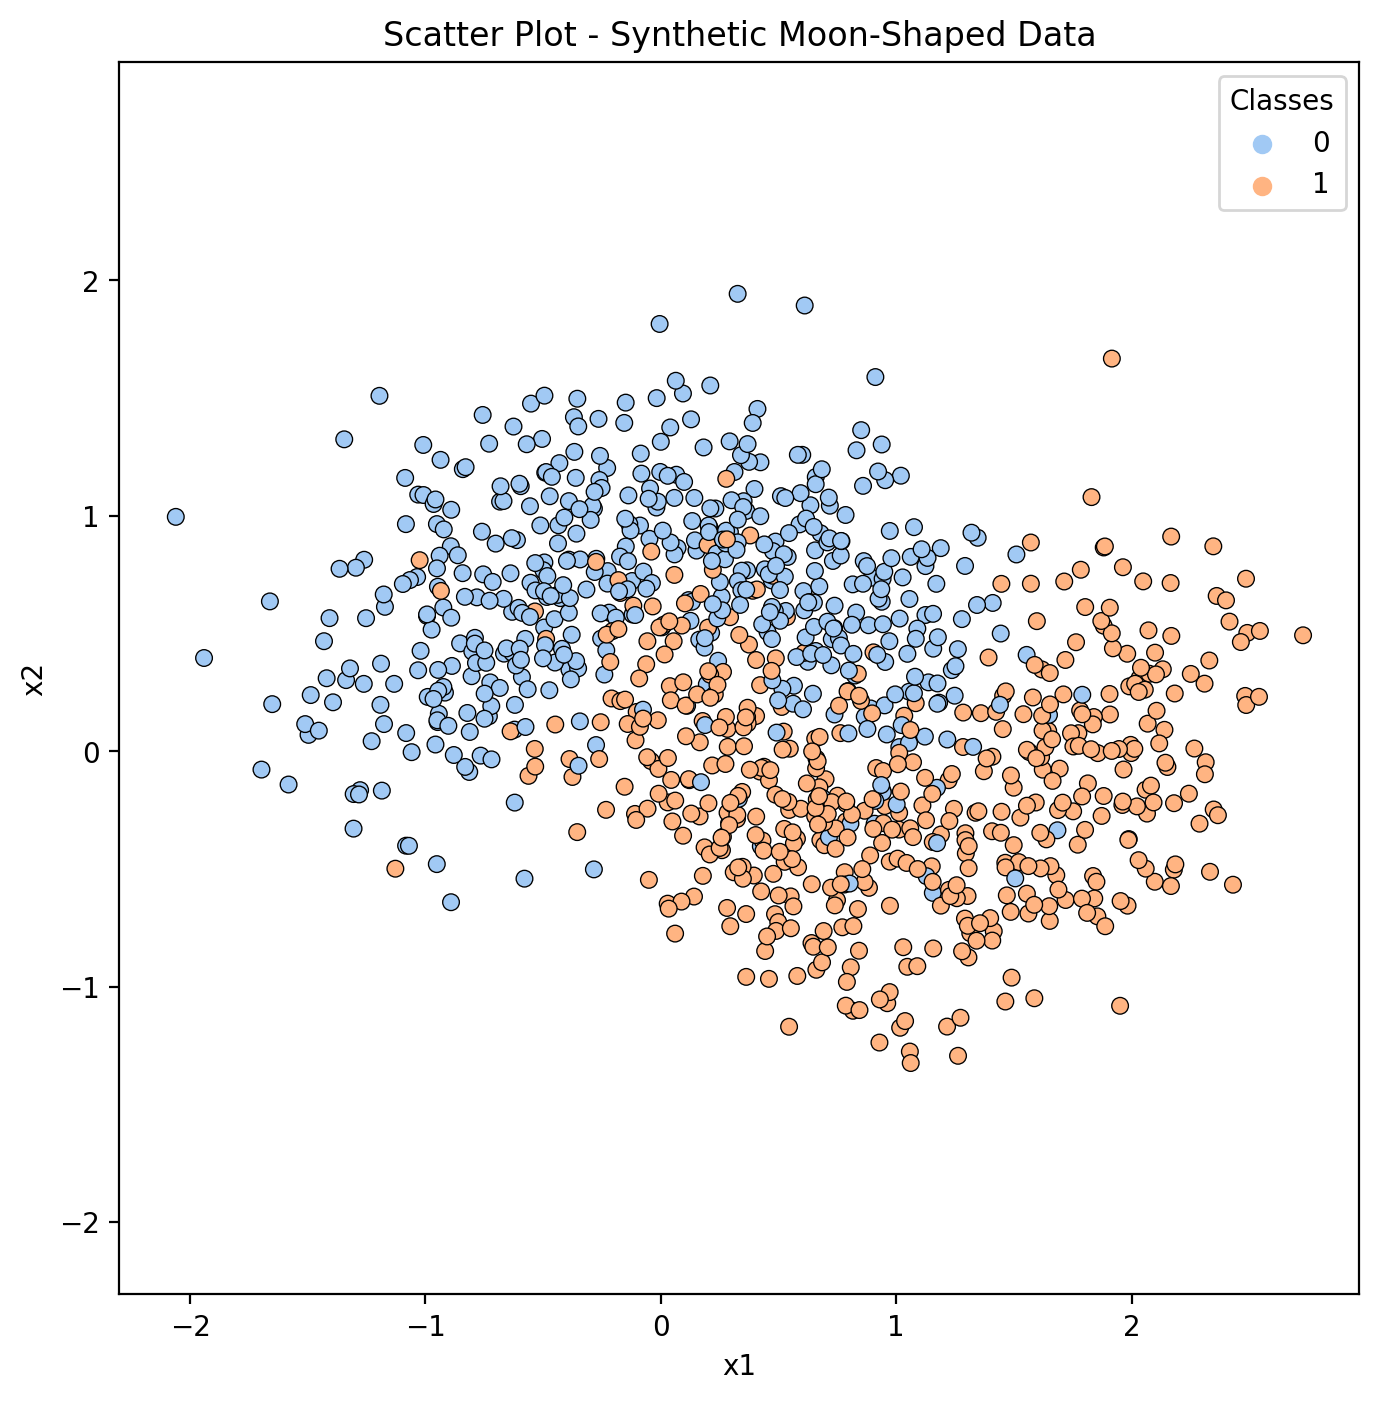

In [11]:
# (a)
X, y = make_moons(n_samples=1000, noise=0.35, random_state=123)

# (b)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="pastel", edgecolor="k")

plt.title("Scatter Plot - Synthetic Moon-Shaped Data")
plt.xlabel("x1")
plt.ylabel("x2")

plt.legend(title="Classes")
plt.axis("equal")

plt.show()

In [12]:
# (c)
np.random.seed(123)
idx1 = np.random.choice(len(X), size=100, replace=True)
idx2 = np.random.choice(len(X), size=100, replace=True)
idx3 = np.random.choice(len(X), size=100, replace=True)

X_1, y_1 = X[idx1], y[idx1]
X_2, y_2 = X[idx2], y[idx2]
X_3, y_3 = X[idx3], y[idx3]

# Dataset 1 ; k=1
Knn_1_1 = KNeighborsClassifier(n_neighbors=1)
Knn_1_1.fit(X_1, y_1)
y_hat_1_1 = Knn_1_1.predict(X_1)

# Dataset 1 ; k=25
Knn_1_25 = KNeighborsClassifier(n_neighbors=25)
Knn_1_25.fit(X_1, y_1)
y_hat_1_25 = Knn_1_25.predict(X_1)

# Dataset 1 ; k=50
Knn_1_50 = KNeighborsClassifier(n_neighbors=50)
Knn_1_50.fit(X_1, y_1)
y_hat_1_50 = Knn_1_50.predict(X_1)

# Dataset 2 ; k=1
Knn_2_1 = KNeighborsClassifier(n_neighbors=1)
Knn_2_1.fit(X_2, y_2)
y_hat_2_1 = Knn_2_1.predict(X_2)

# Dataset 2 ; k=25
Knn_2_25 = KNeighborsClassifier(n_neighbors=25)
Knn_2_25.fit(X_2, y_2)
y_hat_2_25 = Knn_2_25.predict(X_2)

# Dataset 2 ; k=50
Knn_2_50 = KNeighborsClassifier(n_neighbors=50)
Knn_2_50.fit(X_2, y_2)
y_hat_2_50 = Knn_2_50.predict(X_2)

# Dataset 3 ; k=1
Knn_3_1 = KNeighborsClassifier(n_neighbors=1)
Knn_3_1.fit(X_3, y_3)
y_hat_3_1 = Knn_3_1.predict(X_3)

# Dataset 3 ; k=25
Knn_3_25 = KNeighborsClassifier(n_neighbors=25)
Knn_3_25.fit(X_3, y_3)
y_hat_3_25 = Knn_3_25.predict(X_3)

# Dataset 3 ; k=50
Knn_3_50 = KNeighborsClassifier(n_neighbors=50)
Knn_3_50.fit(X_3, y_3)
y_hat_3_50 = Knn_3_50.predict(X_3)

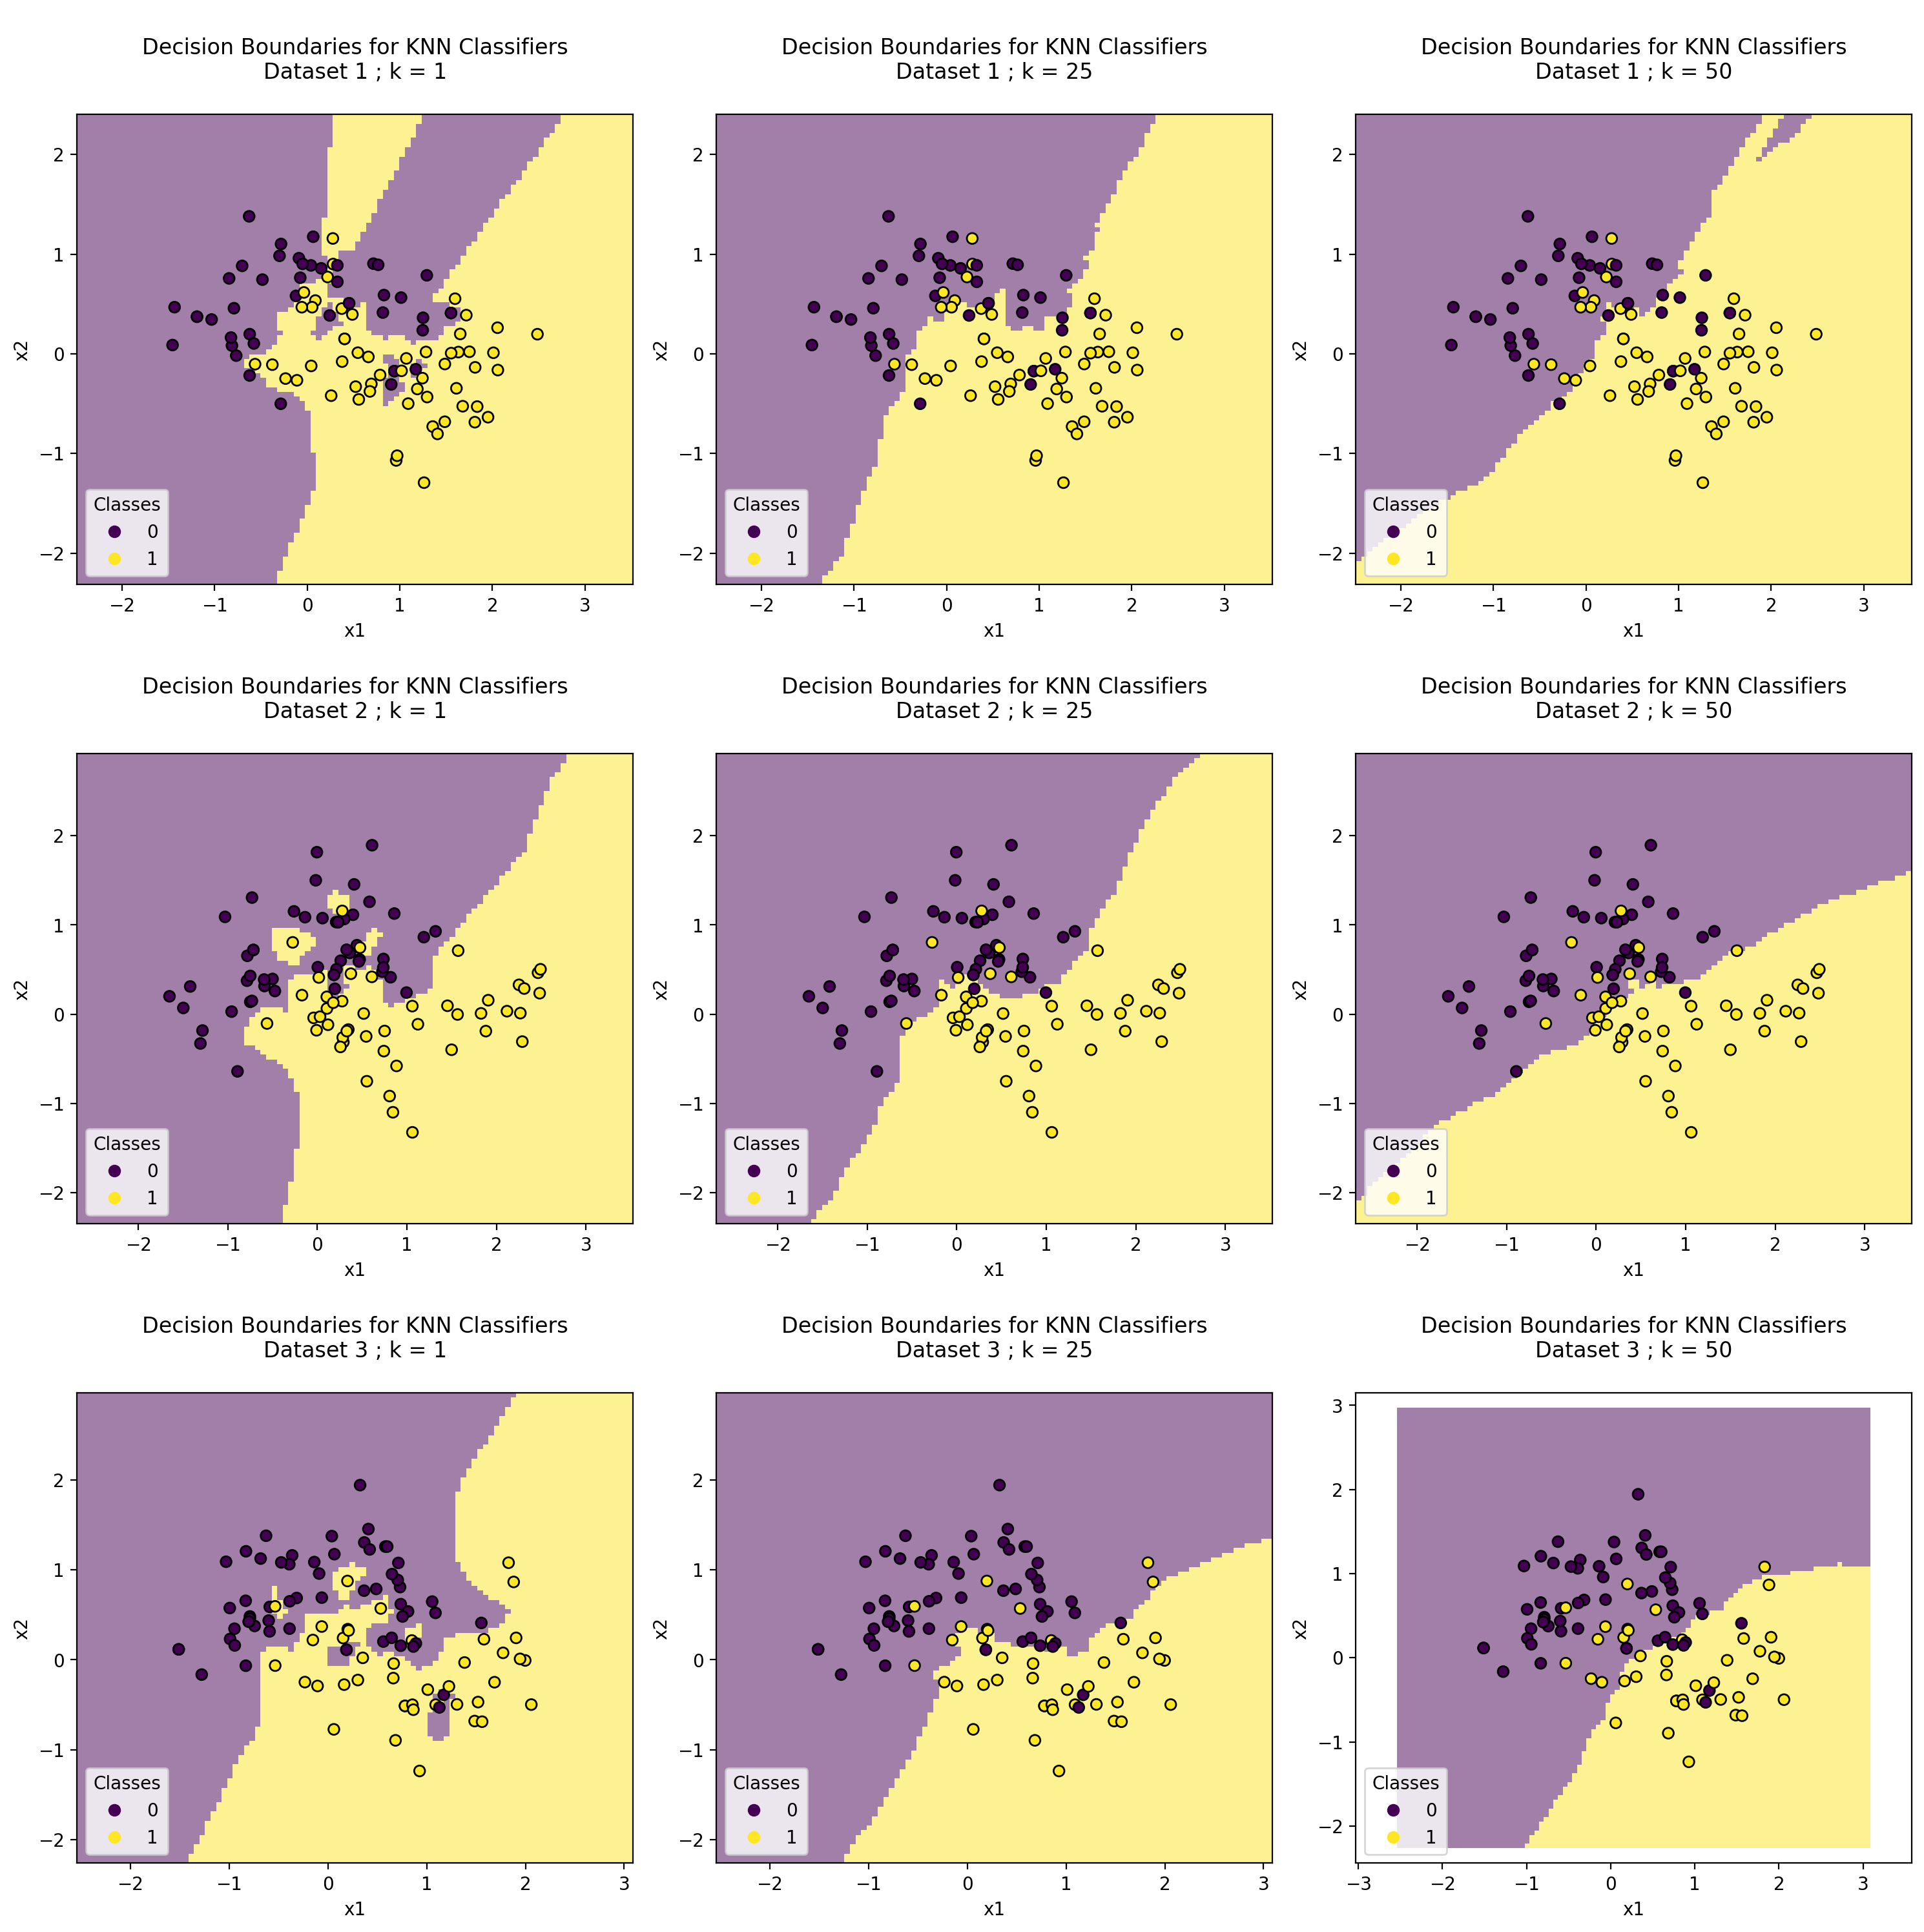

In [13]:
# (d)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

knn = [
    [Knn_1_1, Knn_2_1, Knn_3_1],
    [Knn_1_25, Knn_2_25, Knn_3_25],
    [Knn_1_50, Knn_2_50, Knn_3_50],
]
k = [1, 25, 50]


for j in range(len(knn)):
    for i, (X, y, knn_i) in enumerate(zip([X_1, X_2, X_3], [y_1, y_2, y_3], knn[j])):
        disp = DecisionBoundaryDisplay.from_estimator(
            knn_i,
            X,
            response_method="predict",
            plot_method="pcolormesh",
            xlabel="x1",
            ylabel="x2",
            shading="auto",
            alpha=0.5,
            ax=axs[i, j],
        )

        scatter = axs[i, j].scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")

        axs[i, j].legend(
            scatter.legend_elements()[0],
            np.unique(y),
            loc="lower left",
            title="Classes",
        )

        axs[i, j].set_title(
            f"\nDecision Boundaries for KNN Classifiers\nDataset {i+1} ; k = {k[j]}\n"
        )
plt.axis("equal")
plt.tight_layout()
plt.show()

>**(e)** What do you notice about the difference between the decision boundaries in the rows and the columns in your figure? Which decision boundaries appear to best separate the two classes of data with respect to the training data? Which decision boundaries vary the most as the training data change? Which decision boundaries do you anticipate will generalize best to unseen data and why?
>
>In the preceding graphs, we can observe the effect of varying the number $k$ for different samples of our data. When $k = 1$, we have a highly flexible model that adjusts to the patterns of our training set, resulting in overfitting. This is evidenced by the variability of the decision boundary as we change the dataset used. The lack of consistency across different datasets indicates this overfitting. Although most of the points in the training dataset are classified correctly, it is likely that the generalization ability over new datasets is low, which will be reflected in much lower accuracy in the test data.
>
>On the other hand, with $k = 25$, the model is less flexible, and we observe that the decision boundary is more consistent across different datasets, and we do not see such obvious overfitting.
>
>Finally, at the other extreme, when $k = 50$, we have an inflexible model that tends towards a linear division. Since our original function is not linear but represents a moon-shaped pattern, this model does not fit the data well, resulting in very low accuracy, even in the training dataset.
>
>The decision boundary that appears to best separate the two classes of data concerning the training set seems to be with `k = 1`, given that it is a very flexible model and adjusts more to the data. However, it is important to consider that we are also seeing a case of overfitting.
>
>For this same decision boundary with `k = 1`, we observe that it varies more as the training data change. Being such a flexible model, it fits the data, including its irrecddible error, which makes it difficult to generalize for new examples.
>
>Based on the aforementioned, I anticipate that the decision boundary that will generalize better for unseen data will be with `k = 25`, as it seems to strike a proper balance where there is not as much overfitting as with $k = 1$, nor as many misclassifications as with $k = 50$.
>
>**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.
>
> The bias-variance tradeoff is a principle that we can observe reflected in the previous plots.
>
>For $k = 1$, which is a highly flexible model, we have `low bias`, as the predictions and values predicted by our classifier have high accuracy. However, there is `high variance`, as when we modify the dataset, we encounter different classification boundaries that overfit the data.
>
>On the other hand, at the other extreme, for $k = 50$, we have an inflexible model, with `high bias` because a smaller percentage of the data is well classified with the model. At the same time, it has `low variance` since the decision boundary does not vary much when changing the dataset.
>
>The implication of the bias-variance tradeoff for training supervised machine learning algorithms is that, in general, attempting to decrease one will lead to an increase in the other. Therefore, it is necessary to seek a balance between the two

---

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [14]:
# (a)

X_train = X
y_train = y
X_test, y_test = make_moons(n_samples=1000, noise=0.35, random_state=321)

---

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

In [15]:
import numpy as np
import pandas as pd

path = "./data/"
train = pd.read_csv(path + "A2_Q7_train.csv")
test = pd.read_csv(path + "A2_Q7_test.csv")

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values

FileNotFoundError: [Errno 2] No such file or directory: './data/A2_Q7_train.csv'

**ANSWER**